<a href="https://colab.research.google.com/github/asbhosekar/eda1-aug16th/blob/main/Copy_of_IPL_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Importing the dataset
matches_df = pd.read_csv('/content/sample_data/IPL Matches 2008-2020.csv')
matches_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [19]:
# Importing the dataset
balls_df = pd.read_csv('/content/sample_data/IPL Ball-by-Ball 2008-2020.csv')
balls_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
# Getting an idea about the duplicates in the data
matches_df.duplicated().sum()

np.int64(0)

In [ ]:
# np.int64(0) means that there are no duplicates in the data

In [ ]:
# Getting an idea about the duplicates in the data
balls_df.duplicated().sum()

np.int64(1)

In [ ]:
# np.int64(1) means that there one duplicate row in the dataset

In [ ]:
# Dropping the duplicate rows in the dataset
balls_df = balls_df.drop_duplicates()

In [ ]:
# Getting an idea about the duplicates in the data
balls_df.duplicated().sum()

np.int64(0)

In [ ]:
# np.int64(0) means that there are no duplicates in the data

In [ ]:
# Getting an idea about the shape of the data
print('Shape of balls_df :', balls_df.shape)
print('Number of rows :', balls_df.shape[0])
print('Number of columns :', balls_df.shape[1])

Shape of balls_df : (193467, 18)
Number of rows : 193467
Number of columns : 18


In [ ]:
# Getting an idea about the shape of the data
print('Shape of matches_df :', matches_df.shape)
print('Number of rows :', matches_df.shape[0])
print('Number of columns :', matches_df.shape[1])

Shape of matches_df : (816, 17)
Number of rows : 816
Number of columns : 17


In [ ]:
# Getting an idea about the NULL values in the dataset
balls_df.isnull().sum().any()

np.True_

In [ ]:
# np.True_ means that there are NULL values in the dataset

In [ ]:
# Getting an idea about the NULL values in the dataset
balls_df.isnull().sum()

,0
id,0
inning,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
batsman_runs,0
extra_runs,0
total_runs,0


In [ ]:
# Getting an idea about the NULL values in the dataset
matches_df.isnull().sum().any()

np.True_

In [ ]:
# np.True_ means that there are NULL values in the dataset

In [ ]:
# Getting an idea about the NULL values in the dataset
matches_df.isnull().sum()

,0
id,0
city,13
date,0
player_of_match,4
venue,0
neutral_venue,0
team1,0
team2,0
toss_winner,0
toss_decision,0


In [ ]:
# Mandatory preprocessing
matches_df['date'] = pd.to_datetime(matches_df['date'])
matches_df['season'] = matches_df['date'].dt.year

In [ ]:
# Question 1> What was the count of matches played in each season?
matches_per_season = matches_df['season'].value_counts().sort_index()
print(matches_per_season)

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: count, dtype: int64


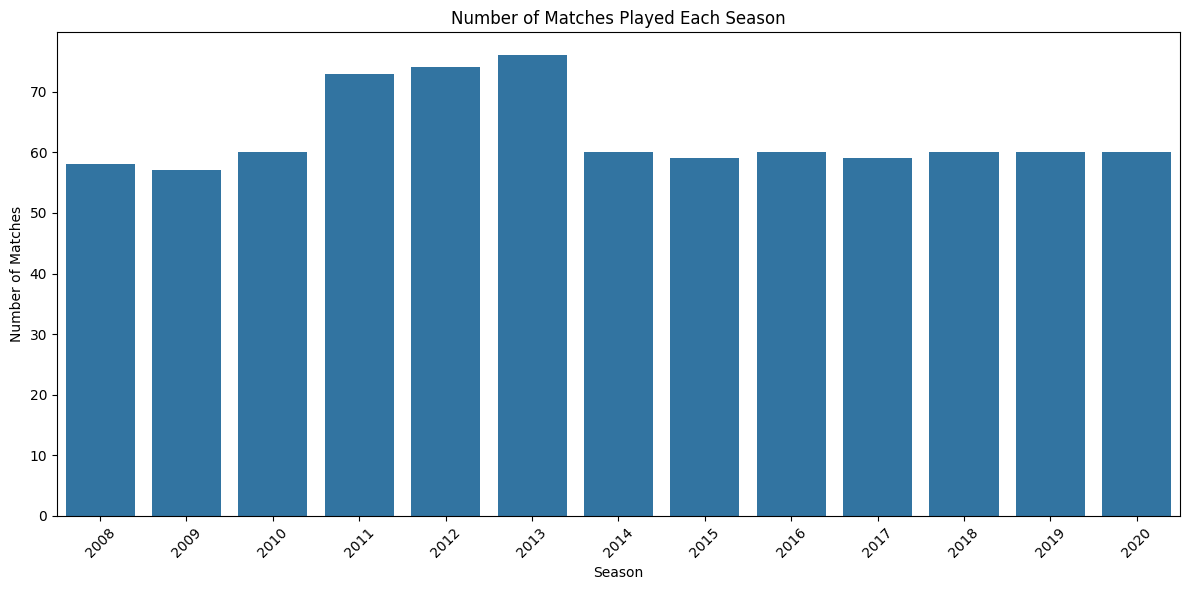

In [ ]:
# Generate a bar plot to visualize the number of matches played each season
plt.figure(figsize=(12, 6))
sns.barplot(x=matches_per_season.index, y=matches_per_season.values)
plt.title('Number of Matches Played Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#2.     How many runs were scored in each season?
merged_df = pd.merge(balls_df, matches_df[['id', 'season']], on='id', how='left')
total_runs_per_season = merged_df.groupby('season')['total_runs'].sum()
print(total_runs_per_season)

season
2008    17937
2009    16320
2010    18863
2011    21154
2012    22453
2013    22541
2014    18909
2015    18332
2016    18862
2017    18769
2018    19901
2019    19400
2020    19352
Name: total_runs, dtype: int64


In [ ]:
# Question 2 How many runs were scored in each season?
merged_df = balls_df.merge(matches_df [['id', 'season']], on = 'id')
runs_per_season = merged_df.groupby('season') ['total_runs'].sum()
print (runs_per_season)

season
2008    17937
2009    16320
2010    18863
2011    21154
2012    22453
2013    22541
2014    18909
2015    18332
2016    18862
2017    18769
2018    19901
2019    19400
2020    19352
Name: total_runs, dtype: int64


In [ ]:
#draw the barplot for above data

In [ ]:
# Generate a bar plot to visualize  How many runs were scored in each season

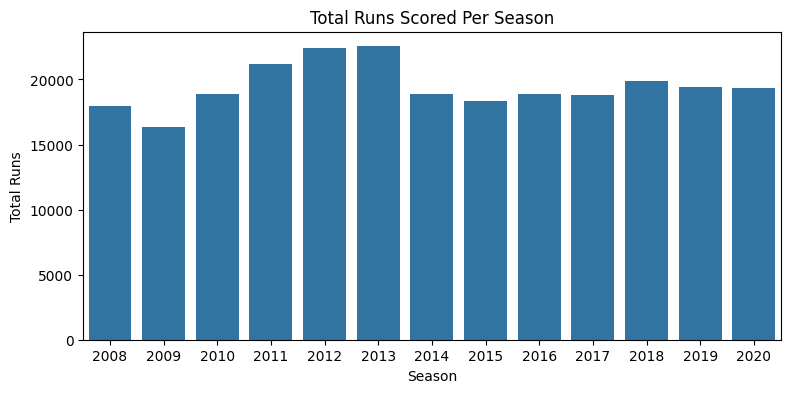

In [ ]:
# Generate a bar plot to visualize how many runs were scored in each season
plt.figure(figsize=(9, 4))
sns.barplot(x=total_runs_per_season.index, y=total_runs_per_season.values)
plt.title('Total Runs Scored Per Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
#plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

In [ ]:
# 3.	What were the runs scored per match in different seasons?

In [ ]:
# Calculate runs scored per match in each season
runs_per_match_per_season = total_runs_per_season / matches_per_season
print(runs_per_match_per_season)

season
2008    309.258621
2009    286.315789
2010    314.383333
2011    289.780822
2012    303.418919
2013    296.592105
2014    315.150000
2015    310.711864
2016    314.366667
2017    318.118644
2018    331.683333
2019    323.333333
2020    322.533333
dtype: float64


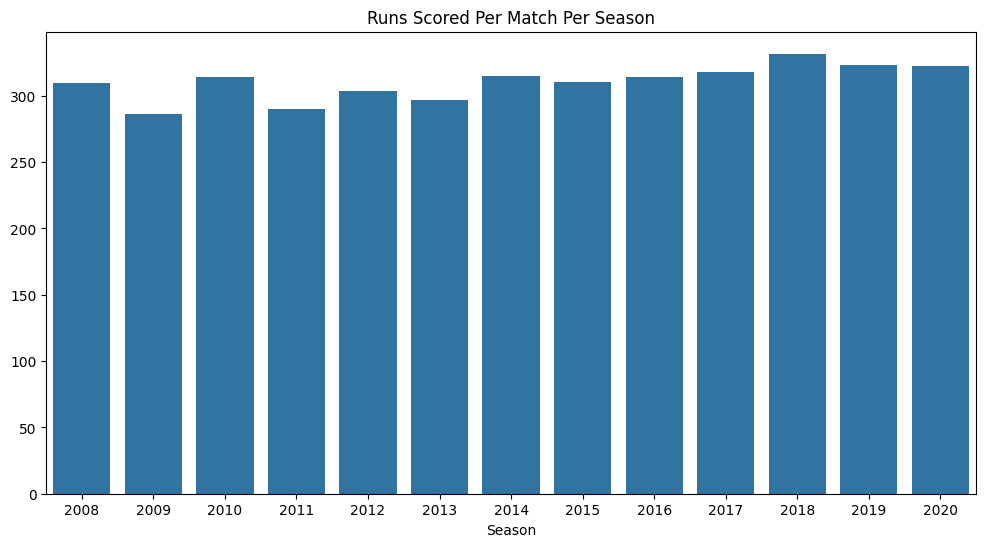

In [ ]:
# Generate a bar plot to visualize runs scored per match in each season
plt.figure(figsize=(12, 6))
sns.barplot(x=runs_per_match_per_season.index, y=runs_per_match_per_season.values)
plt.title('Runs Scored Per Match Per Season')
plt.xlabel('Season')
plt.show()

In [ ]:
# 4.	Who has umpired the most?

In [ ]:
# Count the occurrences of each umpire in both umpire columns
umpire_counts = pd.concat([matches_df['umpire1'], matches_df['umpire2']]).value_counts()

# Find the umpire with the highest count
most_frequent_umpire = umpire_counts.idxmax()
most_frequent_umpire_count = umpire_counts.max()

print(f"The umpire who has umpired the most matches is {most_frequent_umpire} with {most_frequent_umpire_count} matches.")

The umpire who has umpired the most matches is S Ravi with 121 matches.


In [ ]:
# 4.	Who has umpired the most?
#umpires = pd.concat([matches_df['umpire1'], matches_df['umpire2']]).value_counts()
umpires = pd.concat([matches_df['umpire1'], matches_df['umpire2']]).value_counts().idxmax()
print(umpires)

S Ravi


5.	Which team has won the most tosses?

In [ ]:
#5.	Which team has won the most tosses?

In [ ]:
# Count the occurrences of each team in the 'toss_winner' column
toss_winner_counts = matches_df['toss_winner'].value_counts()

# Find the team with the highest toss wins
most_frequent_toss_winner = toss_winner_counts.idxmax()
most_frequent_toss_winner_count = toss_winner_counts.max()

print(f"The team that has won the most tosses is {most_frequent_toss_winner} with {most_frequent_toss_winner_count} toss wins.")

The team that has won the most tosses is Mumbai Indians with 106 toss wins.


In [ ]:
# 6.	What does the team decide after winning the toss?

toss_decision
field    496
bat      320
Name: count, dtype: int64

After winning the toss, teams most commonly choose to field.


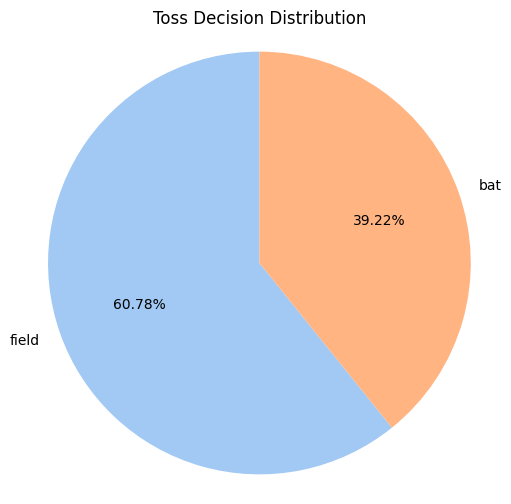

In [ ]:
# Analyze what teams decide after winning the toss
toss_decision_counts = matches_df['toss_decision'].value_counts()
print(toss_decision_counts)

# Summarize the toss decision
most_common_decision = toss_decision_counts.idxmax()
print(f"\nAfter winning the toss, teams most commonly choose to {most_common_decision}.")

# Visualize toss decisions with a pie chart
plt.figure(figsize=(6, 6))
plt.pie(toss_decision_counts, labels=toss_decision_counts.index, autopct='%.2f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Toss Decision Distribution')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
#7.	How does the toss decision vary across seasons?

toss_decision  bat  field
season                   
2008            26     32
2009            35     22
2010            39     21
2011            25     48
2012            37     37
2013            45     31
2014            19     41
2015            25     34
2016            11     49
2017            11     48
2018            10     50
2019            10     50
2020            27     33


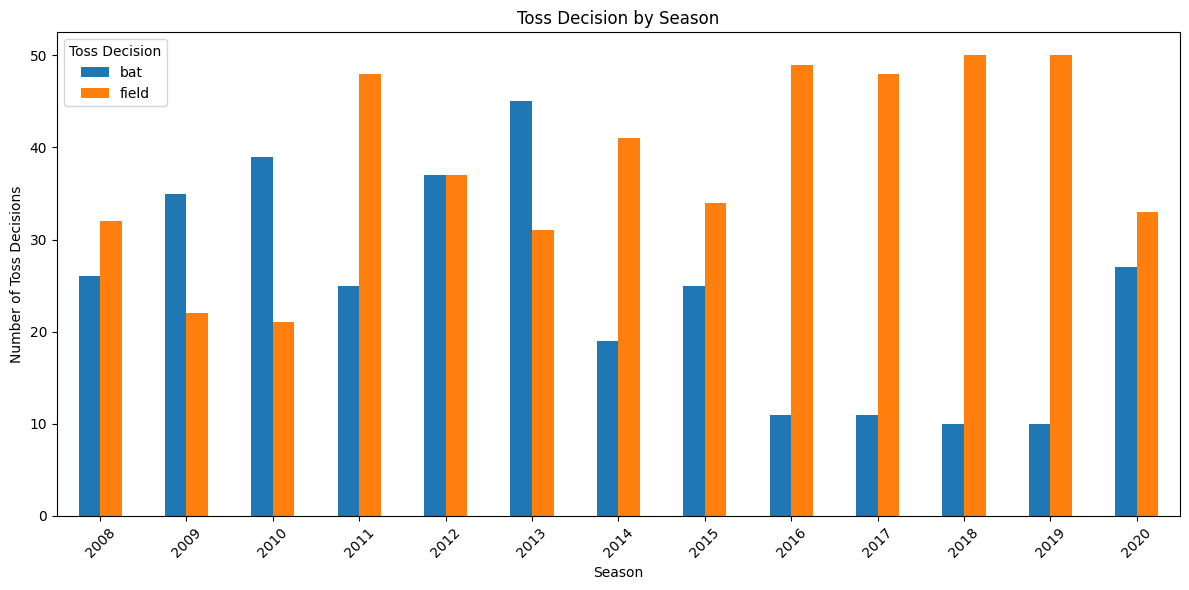

In [ ]:
# Analyze how the toss decision varies across seasons
toss_decision_by_season = matches_df.groupby('season')['toss_decision'].value_counts().unstack()
print(toss_decision_by_season)

# Visualize the toss decision by season
toss_decision_by_season.plot(kind='bar', figsize=(12, 6))
plt.title('Toss Decision by Season')
plt.xlabel('Season')
plt.ylabel('Number of Toss Decisions')
plt.xticks(rotation=45)
plt.legend(title='Toss Decision')
plt.tight_layout()
plt.show()

In [ ]:
# Question 7-> How does the toss decisión vary across seasons?
toss_decision_by_season = matches_df.groupby (['season', 'toss_decision']) ['id'].count()
print(toss_decision_by_season)

season  toss_decision
2008    bat              26
        field            32
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    bat              25
        field            48
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    bat              19
        field            41
2015    bat              25
        field            34
2016    bat              11
        field            49
2017    bat              11
        field            48
2018    bat              10
        field            50
2019    bat              10
        field            50
2020    bat              27
        field            33
Name: id, dtype: int64


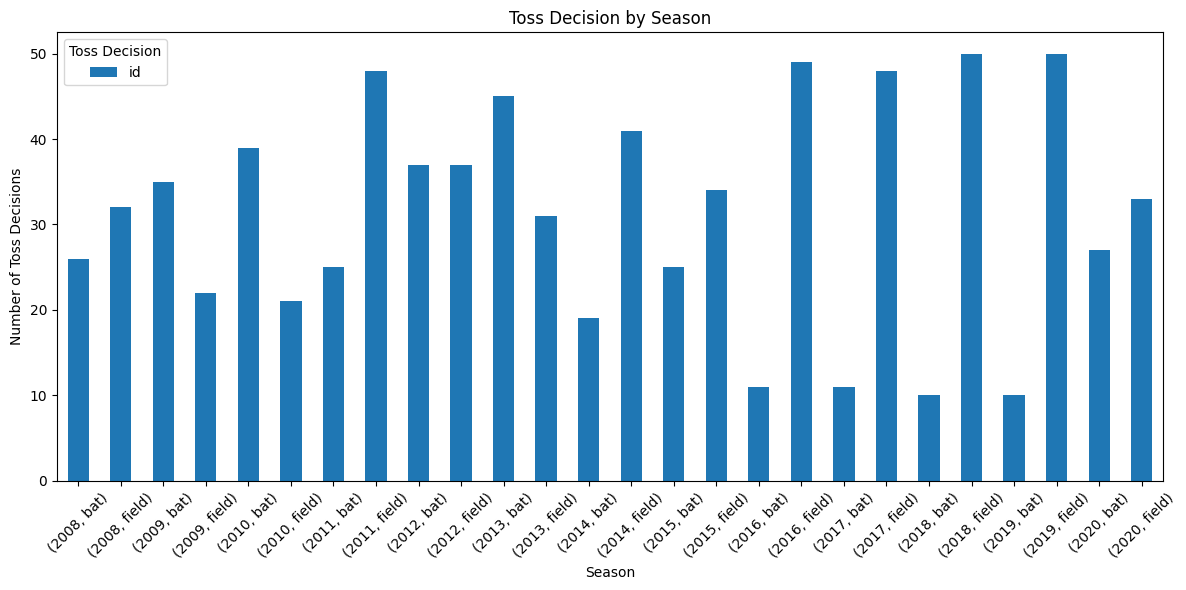

In [ ]:
# Visualize the toss decision by season
toss_decision_by_season.plot(kind='bar', figsize=(12, 6))
plt.title('Toss Decision by Season')
plt.xlabel('Season')
plt.ylabel('Number of Toss Decisions')
plt.xticks(rotation=45)
plt.legend(title='Toss Decision')
plt.tight_layout()
plt.show()

In [ ]:
# Analyze if winning the toss implies winning the game
toss_and_match_wins = matches_df[matches_df['toss_winner'] == matches_df['winner']]

# Calculate the number of matches where the toss winner was also the match winner
num_toss_and_match_wins = toss_and_match_wins.shape[0]

# Calculate the total number of matches
total_matches = matches_df.shape[0]

# Calculate the win percentage for teams winning the toss
win_percentage_after_toss = (num_toss_and_match_wins / total_matches) * 100

print(f"Out of {total_matches} matches, the team that won the toss also won the match in {num_toss_and_match_wins} instances.")
print(f"This represents a win percentage of {win_percentage_after_toss:.2f}% for teams that won the toss.")

Out of 816 matches, the team that won the toss also won the match in 418 instances.
This represents a win percentage of 51.23% for teams that won the toss.


toss_win_match_win
True     418
False    398
Name: count, dtype: int64


Text(0.5, 1.0, 'Toss Decision Distribution')

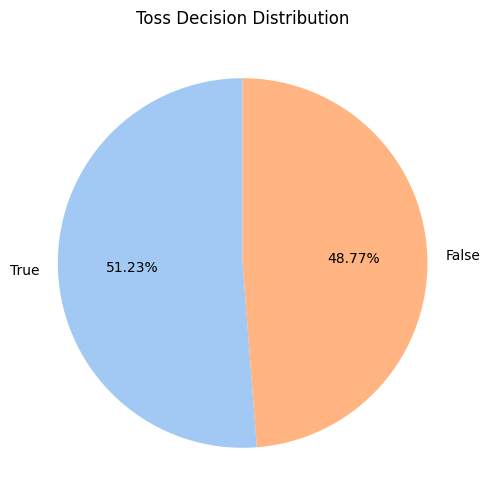

In [ ]:
# Question 8 Does winning the toss imply winning the game?
matches_df['toss_win_match_win'] = matches_df ['toss_winner'] == matches_df['winner']
toss_win_match_win_count = matches_df['toss_win_match_win'].value_counts()
print(toss_win_match_win_count)

# Visualize toss decisions with a pie chart
plt.figure(figsize=(6, 6))
plt.pie(toss_win_match_win_count, labels=toss_win_match_win_count.index, autopct='%.2f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Toss Decision Distribution')

In [ ]:
# Calculate how many times the chasing team won
chasing_wins = matches_df[matches_df['winner'] == matches_df['team2']]

# Get the number of matches won by the chasing team
num_chasing_wins = chasing_wins.shape[0]

print(f"The chasing team has won the match {num_chasing_wins} times.")

The chasing team has won the match 367 times.


In [ ]:
# Calculate how many times the chasing team won based on the 'result' column
chasing_wins_by_result = matches_df[matches_df['result'] == 'wickets']

# Get the number of matches won by the chasing team
num_chasing_wins_by_result = chasing_wins_by_result.shape[0]

print(f"The chasing team has won the match {num_chasing_wins_by_result} times based on the 'result' column.")

The chasing team has won the match 435 times based on the 'result' column.


In [ ]:
#Question 9> How many times has the chasing team won the match?
win_type_count = matches_df['result'].value_counts()
print(win_type_count)

result
wickets    435
runs       364
tie         13
Name: count, dtype: int64


In [ ]:
# Question 10 Which all teams had won this tournament?
winning_teams = matches_df['winner'].unique()
print(winning_teams)

['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Daredevils'
 'Royal Challengers Bangalore' 'Rajasthan Royals' 'Kings XI Punjab'
 'Deccan Chargers' 'Mumbai Indians' 'Pune Warriors' 'Kochi Tuskers Kerala'
 nan 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals']


In [ ]:
# Calculate which team has played the most number of matches
team_counts = pd.concat([matches_df['team1'], matches_df['team2']]).value_counts()

# Find the team that has played the most matches
most_frequent_team = team_counts.idxmax()
most_frequent_team_count = team_counts.max()

print(f"The team that has played the most matches is {most_frequent_team} with {most_frequent_team_count} matches.")

The team that has played the most matches is Mumbai Indians with 203 matches.


In [ ]:
# Question 12 -> Which team has won most number of matches?
matches_played = pd.concat([matches_df['team1'], matches_df['team2']]).value_counts()
most_matches_played = matches_played.idxmax()
print(most_matches_played)

Mumbai Indians


In [ ]:
#13.	Which team has the highest winning percentage?
# Calculate the number of wins for each team
win_counts = matches_df['winner'].value_counts()

# Calculate the total matches played by each team (already calculated in team_counts)

# Calculate the winning percentage for each team
# Need to handle cases where a team might have wins but no corresponding entry in team_counts (though unlikely with this data)
winning_percentage = (win_counts / team_counts) * 100

# Find the team with the highest winning percentage
highest_winning_percentage_team = winning_percentage.idxmax()
highest_winning_percentage_value = winning_percentage.max()

print(f"The team with the highest winning percentage is {highest_winning_percentage_team} with a winning percentage of {highest_winning_percentage_value:.2f}%.")

The team with the highest winning percentage is Rising Pune Supergiant with a winning percentage of 62.50%.


In [ ]:
# Question 13 Which team has the highest winning percentage?
total_matches_team = matches_df ['team1'].value_counts() + matches_df['team2'].value_counts()
matches_won_team = matches_df ['winner'].value_counts()
winning_percentage = (matches_won_team / total_matches_team) * 100
highest_winning_percentage = winning_percentage.idxmax()
print(highest_winning_percentage)

Rising Pune Supergiant


In [ ]:
# Analyze team wins at each venue
venue_wins = matches_df.groupby(['venue', 'winner']).size().unstack(fill_value=0)

# To identify potentially "lucky" venues, we can look for venues where a team has a high number of wins.
# One way is to find the team with the maximum wins at each venue.
most_wins_at_venue = venue_wins.idxmax(axis=1)
max_wins_at_venue = venue_wins.max(axis=1)

# Combine this information
venue_luck = pd.DataFrame({'Most Winning Team': most_wins_at_venue, 'Number of Wins': max_wins_at_venue})

print("Team with most wins at each venue:")
print(venue_luck)

# We can also look at venues where a team has a significantly high number of wins compared to their wins at other venues.
# This requires further analysis, but the table above gives a good starting point.

Team with most wins at each venue:
                                                              Most Winning Team  \
venue                                                                             
Barabati Stadium                                                Deccan Chargers   
Brabourne Stadium                                                Mumbai Indians   
Buffalo Park                                                Chennai Super Kings   
De Beers Diamond Oval                                       Chennai Super Kings   
Dr DY Patil Sports Academy                                       Mumbai Indians   
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...          Sunrisers Hyderabad   
Dubai International Cricket Stadium                         Chennai Super Kings   
Eden Gardens                                              Kolkata Knight Riders   
Feroz Shah Kotla                                               Delhi Daredevils   
Green Park                                          

In [ ]:
# Question 14 -> Is there any lucky venue for a particular team?
lucky_venues = matches_df.groupby(['winner', 'venue']).size().reset_index(name = 'count')
lucky_venues = lucky_venues.sort_values(by = 'count', ascending = False)
print(lucky_venues)

                    winner                                             venue  \
119  Kolkata Knight Riders                                      Eden Gardens   
162         Mumbai Indians                                  Wankhede Stadium   
13     Chennai Super Kings                   MA Chidambaram Stadium, Chepauk   
186       Rajasthan Royals                            Sawai Mansingh Stadium   
240    Sunrisers Hyderabad         Rajiv Gandhi International Stadium, Uppal   
..                     ...                                               ...   
242    Sunrisers Hyderabad            Saurashtra Cricket Association Stadium   
244    Sunrisers Hyderabad  Shaheed Veer Narayan Singh International Stadium   
243    Sunrisers Hyderabad                            Sawai Mansingh Stadium   
247    Sunrisers Hyderabad                        Subrata Roy Sahara Stadium   
248    Sunrisers Hyderabad                                  Wankhede Stadium   

     count  
119     45  
162     42  


In [10]:
#Question 16 Which team has scored the most number of 200+ scores?
team_total_runs = balls_df.groupby(['id', 'batting_team']) ['total_runs'].sum().reset_index()
team_200_plus_runs = team_total_runs [team_total_runs['total_runs'] >= 200]
team_200_plus_runs['batting_team'].value_counts()

,count
batting_team,
Royal Challengers Bangalore,19
Chennai Super Kings,17
Kings XI Punjab,14
Mumbai Indians,14
Kolkata Knight Riders,12
Sunrisers Hyderabad,12
Rajasthan Royals,9
Delhi Daredevils,5
Delhi Capitals,2


In [11]:
# Question 17 -> Which team has conceded 200+ scores the most?
team_200plus_against = balls_df.groupby (['id', 'bowling_team']) ['total_runs'].sum().reset_index()
team_200plus_against = team_200plus_against [team_200plus_against['total_runs'] >= 200]
most_conceded_200_plus = team_200plus_against['bowling_team'].value_counts().head(1)
print(most_conceded_200_plus.index)

Index(['Kings XI Punjab'], dtype='object', name='bowling_team')


In [13]:
# Question 18 -> What was the highest run scored by a team in a single match?
highest_team_score = team_total_runs.sort_values('total_runs', ascending = False).head(1)
print(highest_team_score['total_runs'].values)

[263]


In [15]:
#Question 19-> Which is the biggest win in terms of run margin?
biggest_run_margin_win = matches_df [matches_df['result'] == 'runs'].sort_values('result_margin', ascending = False)
biggest_run_margin_win.head(1)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan


In [16]:
# Which batsmen have played the most number of balls?
batsman_ball_counts = balls_df['batsman'].value_counts()

# Get the batsman who played the most balls
most_balls_batsman = batsman_ball_counts.idxmax()
most_balls_count = batsman_ball_counts.max()

print(f"The batsman who has played the most number of balls is {most_balls_batsman} with {most_balls_count} balls.")

The batsman who has played the most number of balls is V Kohli with 4609 balls.


In [18]:
# Question 20> Which batsmen have played the most number of balls?
balls_played = balls_df.groupby('batsman') ['ball'].count()
most_balls_played = balls_played.idxmax()
print(most_balls_played)

V Kohli


In [20]:
# Question 21 -> Who are the leading run-scorers of all time?
top_run_scorers = balls_df.groupby('batsman') ['batsman_runs'].sum().sort_values (ascending = False).head(10)
print(top_run_scorers)

batsman
V Kohli           5878
SK Raina          5368
DA Warner         5254
RG Sharma         5230
S Dhawan          5197
AB de Villiers    4849
CH Gayle          4772
MS Dhoni          4632
RV Uthappa        4607
G Gambhir         4217
Name: batsman_runs, dtype: int64


In [21]:
#Question 22> Who has hit the most number of 4's?
fours = balls_df[balls_df[ 'batsman_runs'] == 4]
most_4s = fours['batsman'].value_counts().idxmax()
print(most_4s)

S Dhawan


In [22]:
# Question 23 -> Who has hit the most number of 6's?
sixes = balls_df[balls_df['batsman_runs'] == 6]
most_6s = sixes['batsman'].value_counts().idxmax()
print(most_6s)

CH Gayle


In [24]:
# Question -> Who has the highest strike rate?
import numpy as np

# Calculate total runs scored by each batsman
batsman_runs = balls_df.groupby('batsman')['batsman_runs'].sum()

# Calculate the number of balls faced by each batsman (excluding extras like wides and no-balls that don't count as a ball faced by the batsman)
# We can count the total number of deliveries for each batsman from balls_df
balls_faced = balls_df.groupby('batsman')['ball'].count()

# Calculate the strike rate for each batsman (Runs / Balls faced * 100)
# Handle cases where a batsman might have faced 0 balls to avoid division by zero
strike_rates = (batsman_runs / balls_faced) * 100
strike_rates = strike_rates.replace([np.inf, -np.inf], np.nan).dropna() # Replace inf with NaN and drop NaN values

# Find the batsman with the highest strike rate
highest_strike_rate_batsman = strike_rates.idxmax()
highest_strike_rate_value = strike_rates.max()

print(f"The batsman with the highest strike rate is {highest_strike_rate_batsman} with a strike rate of {highest_strike_rate_value:.2f}.")

The batsman with the highest strike rate is B Stanlake with a strike rate of 250.00.


In [26]:
#Question 24> Who has the highest strike rate?
balls_faced = balls_df.groupby ('batsman') ['ball'].count()
total_runs = balls_df.groupby('batsman') ['batsman_runs'].sum()
strike_rate = (total_runs / balls_faced) * 100
highest_strike_rate = strike_rate.idxmax()
print(highest_strike_rate)

B Stanlake


In [27]:
# Question -> Who is the leading wicket-taker?

# Filter the balls_df to include only wickets
wickets_df = balls_df[balls_df['is_wicket'] == 1]

# Count the number of wickets for each bowler
wicket_counts = wickets_df['bowler'].value_counts()

# Get the bowler with the highest wicket count
leading_wicket_taker = wicket_counts.idxmax()
leading_wicket_count = wicket_counts.max()

print(f"The leading wicket-taker is {leading_wicket_taker} with {leading_wicket_count} wickets.")

The leading wicket-taker is SL Malinga with 188 wickets.


In [28]:
# Question 25 Who is the leading wicket-taker?
wickets_df = balls_df [balls_df['is_wicket'] == 1]
wickets_df = wickets_df[wickets_df['dismissal_kind']
!= 'run out']
leading_wicket_taker = wickets_df['player_dismissed'].value_counts().idxmax()
print(leading_wicket_taker)

RG Sharma


In [29]:
# Question -> Which stadium has hosted the most number of matches?

# Count the occurrences of each venue in the 'venue' column
venue_counts = matches_df['venue'].value_counts()

# Get the venue with the highest count
most_frequent_venue = venue_counts.idxmax()
most_frequent_venue_count = venue_counts.max()

print(f"The stadium that has hosted the most number of matches is {most_frequent_venue} with {most_frequent_venue_count} matches.")

The stadium that has hosted the most number of matches is Eden Gardens with 77 matches.


In [32]:
# Question 26 -> Which stadium has hosted the most number of matches?
stadium_matches = matches_df['venue'].value_counts()
most_hosted_stadium = stadium_matches.idxmax()
print(most_hosted_stadium)

Eden Gardens


In [31]:
# Question -> Who has won the most MOM awards?

# Count the occurrences of each player in the 'player_of_match' column
mom_counts = matches_df['player_of_match'].value_counts()

# Get the player with the highest MOM count
most_mom_player = mom_counts.idxmax()
most_mom_count = mom_counts.max()

print(f"The player who has won the most Player of the Match awards is {most_mom_player} with {most_mom_count} awards.")

The player who has won the most Player of the Match awards is AB de Villiers with 23 awards.


In [34]:
# Question -> What is the count of fours hit in each season?

# Merge the dataframes to get season information for each ball
merged_df = balls_df.merge(matches_df[['id', 'season']], on='id', how='left')

# Filter for fours (batsman_runs == 4)
fours_df = merged_df[merged_df['batsman_runs'] == 4]

# Count the number of fours per season
fours_per_season = fours_df['season'].value_counts().sort_index()

print("Count of fours hit in each season:")
print(fours_per_season)

Count of fours hit in each season:
season
2008    1703
2009    1317
2010    1708
2011    1916
2012    1911
2013    2052
2014    1562
2015    1607
2016    1633
2017    1611
2018    1652
2019    1653
2020    1583
Name: count, dtype: int64


In [37]:
# Question 28 -> What is the count of fours hit in each season?
fours_season = fours.merge (matches_df[['id', 'season']], on = 'id')
fours_by_season = fours_season.groupby('season').size()
print(fours_by_season)

season
2008    1703
2009    1317
2010    1708
2011    1916
2012    1911
2013    2052
2014    1562
2015    1607
2016    1633
2017    1611
2018    1652
2019    1653
2020    1583
dtype: int64


In [35]:
# Question -> What is the count of sixes hit in each season?

# Ensure the 'season' column exists in matches_df
if 'season' not in matches_df.columns:
    matches_df['date'] = pd.to_datetime(matches_df['date'])
    matches_df['season'] = matches_df['date'].dt.year

# Merge the dataframes to get season information for each ball
merged_df = balls_df.merge(matches_df[['id', 'season']], on='id', how='left')

# Filter for sixes (batsman_runs == 6)
sixes_df = merged_df[merged_df['batsman_runs'] == 6]

# Count the number of sixes per season
sixes_per_season = sixes_df['season'].value_counts().sort_index()

print("Count of sixes hit in each season:")
print(sixes_per_season)

Count of sixes hit in each season:
season
2008    623
2009    506
2010    585
2011    639
2012    733
2013    675
2014    714
2015    692
2016    639
2017    705
2018    872
2019    784
2020    735
Name: count, dtype: int64


In [38]:
# Question -> What is the count of sixes hit in each season?

# Ensure the 'season' column exists in matches_df
if 'season' not in matches_df.columns:
    matches_df['date'] = pd.to_datetime(matches_df['date'])
    matches_df['season'] = matches_df['date'].dt.year

# Merge the dataframes to get season information for each ball
merged_df = balls_df.merge(matches_df[['id', 'season']], on='id', how='left')

# Filter for sixes (batsman_runs == 6)
sixes_df = merged_df[merged_df['batsman_runs'] == 6]

# Count the number of sixes per season
sixes_per_season = sixes_df['season'].value_counts().sort_index()

print("Count of sixes hit in each season:")
print(sixes_per_season)

Count of sixes hit in each season:
season
2008    623
2009    506
2010    585
2011    639
2012    733
2013    675
2014    714
2015    692
2016    639
2017    705
2018    872
2019    784
2020    735
Name: count, dtype: int64


In [39]:
# Question 29 -> What is the count of fours hit in each season?
sixes_season = sixes.merge (matches_df[['id', 'season']], on = 'id')
sixes_by_season = sixes_season.groupby('season').size()
print(sixes_by_season)

season
2008    623
2009    506
2010    585
2011    639
2012    733
2013    675
2014    714
2015    692
2016    639
2017    705
2018    872
2019    784
2020    735
dtype: int64


In [40]:
# What is the count of runs scored from boundaries in each season?

# Ensure the 'season' column exists in matches_df
if 'season' not in matches_df.columns:
    matches_df['date'] = pd.to_datetime(matches_df['date'])
    matches_df['season'] = matches_df['date'].dt.year

# Merge the dataframes to get season information for each ball
merged_df = balls_df.merge(matches_df[['id', 'season']], on='id', how='left')

# Filter for balls that resulted in a boundary (4 or 6 runs)
boundary_runs_df = merged_df[merged_df['batsman_runs'].isin([4, 6])]

# Group by season and sum the runs from boundaries
boundary_runs_per_season = boundary_runs_df.groupby('season')['batsman_runs'].sum()

print("Total runs scored from boundaries in each season:")
print(boundary_runs_per_season)

Total runs scored from boundaries in each season:
season
2008    10550
2009     8304
2010    10342
2011    11498
2012    12042
2013    12258
2014    10532
2015    10580
2016    10366
2017    10674
2018    11840
2019    11316
2020    10742
Name: batsman_runs, dtype: int64


In [42]:
# Question 30 What is the count of runs scored from boundaries in each season?
boundaries = balls_df [(balls_df['batsman_runs'] == 4) | (balls_df ['batsman_runs'] == 6)]
boundaries_season = boundaries.merge(matches_df [['id', 'season']], on = 'id')
runs_from_boundaries = boundaries_season.groupby('season') ['batsman_runs'].sum()
print(runs_from_boundaries)

season
2008    10550
2009     8304
2010    10342
2011    11498
2012    12042
2013    12258
2014    10532
2015    10580
2016    10366
2017    10674
2018    11840
2019    11316
2020    10742
Name: batsman_runs, dtype: int64


In [47]:
# What is the run contribution from boundaries in each season?

# Ensure the 'season' column exists in matches_df
if 'season' not in matches_df.columns:
    matches_df['date'] = pd.to_datetime(matches_df['date'])
    matches_df['season'] = matches_df['date'].dt.year

# Merge the dataframes to get season information for each ball
merged_df = balls_df.merge(matches_df[['id', 'season']], on='id', how='left')

# Filter for balls that resulted in a boundary (4 or 6 runs)
boundary_runs_df = merged_df[merged_df['batsman_runs'].isin([4, 6])]

# Group by season and sum the runs from boundaries
boundary_runs_per_season = boundary_runs_df.groupby('season')['batsman_runs'].sum()

print("Run contribution from boundaries in each season:")
print(boundary_runs_per_season)

Run contribution from boundaries in each season:
season
2008    10550
2009     8304
2010    10342
2011    11498
2012    12042
2013    12258
2014    10532
2015    10580
2016    10366
2017    10674
2018    11840
2019    11316
2020    10742
Name: batsman_runs, dtype: int64


In [46]:
#Question 31 -> What is the run contribution from boundaries in each season?
total_runs_season = merged_df.groupby('season') ['total_runs'].sum()
boundary_contribution_percent = ((runs_from_boundaries / total_runs_season) * 100).round(3)
print(boundary_contribution_percent)

season
2008    58.817
2009    50.882
2010    54.824
2011    54.354
2012    53.632
2013    54.381
2014    55.698
2015    57.713
2016    54.957
2017    56.870
2018    59.494
2019    58.330
2020    55.508
dtype: float64


In [48]:
# Question 32 -> Which team has scored the most runs in the first 6 overs?
powerplay_runs = balls_df[(balls_df['over'] >= 1) & (balls_df['over'] <= 6)]
powerplay_team_runs = powerplay_runs.groupby('batting_team') ['total_runs'].sum()
print(powerplay_team_runs)

batting_team
Chennai Super Kings            8364
Deccan Chargers                3407
Delhi Capitals                 1591
Delhi Daredevils               7506
Gujarat Lions                  1609
Kings XI Punjab                9095
Kochi Tuskers Kerala            666
Kolkata Knight Riders          8899
Mumbai Indians                 9307
Pune Warriors                  1877
Rajasthan Royals               7240
Rising Pune Supergiant          786
Rising Pune Supergiants         672
Royal Challengers Bangalore    8737
Sunrisers Hyderabad            5954
Name: total_runs, dtype: int64


In [49]:
# Question 33 > Which team has scored the most runs in the last 4 overs?
death_over_runs = balls_df[(balls_df['over'] >= 17) & (balls_df['over'] <= 20)]
death_over_team_runs = death_over_runs.groupby('batting_team') ['total_runs'].sum()
print(death_over_team_runs)

batting_team
Chennai Super Kings            5045
Deccan Chargers                1837
Delhi Capitals                  855
Delhi Daredevils               3709
Gujarat Lions                   663
Kings XI Punjab                4649
Kochi Tuskers Kerala            255
Kolkata Knight Riders          4508
Mumbai Indians                 5708
Pune Warriors                  1037
Rajasthan Royals               3662
Rising Pune Supergiant          443
Rising Pune Supergiants         330
Royal Challengers Bangalore    5099
Sunrisers Hyderabad            3198
Name: total_runs, dtype: int64


In [50]:
# Question 34 -> Which team has the best scoring run-rate in the first 6 overs?
powerplay_innings = powerplay_runs.groupby(['id', 'batting_team'])['total_runs'].sum().reset_index()
pp_runrate = powerplay_innings.groupby('batting_team')['total_runs'].agg(['sum', 'count'])
pp_runrate['run_rate'] = pp_runrate['sum'] / pp_runrate['count']
print(pp_runrate['run_rate'].idxmax())

Gujarat Lions


In [51]:
# Question 35 -> Which team has the best scoring run-rate in the last 4 overs?
death_innings = death_over_runs.groupby(['id', 'batting_team'])['total_runs'].sum().reset_index()
death_runrate = death_innings.groupby('batting_team')['total_runs'].agg(['sum', 'count'])
death_runrate['run_rate'] = death_runrate['sum'] / death_runrate['count']
print(death_runrate['run_rate'].idxmax())

Rising Pune Supergiant


## Summary of Key Findings and Trends

Based on the analysis of the IPL dataset (2008-2020) so far, here are some key findings and interesting trends:

*   **Matches per Season**: The number of matches played per season has varied, with a notable increase in the 2011-2013 seasons before stabilizing around 60 matches per season.
*   **Total Runs per Season**: The total runs scored per season generally follows the trend of the number of matches, with higher total runs in seasons with more matches.
*   **Runs per Match per Season**: The runs scored per match have shown a general upward trend over the seasons, indicating potentially higher scoring games in recent years.
*   **Most Frequent Umpire**: S Ravi has umpired the most matches (121).
*   **Most Toss Wins**: Mumbai Indians have won the most tosses (106).
*   **Toss Decision Trend**: Teams winning the toss most commonly choose to field (60.78%), and this trend has become more pronounced in recent seasons.
*   **Toss Win vs. Match Win**: Winning the toss does not guarantee winning the match, with a win percentage of around 51.23% for teams that won the toss.
*   **Chasing Success**: Chasing teams have won a significant number of matches (435 times based on 'wickets' result), indicating that batting second can be advantageous.
*   **Teams with 200+ Scores**: Royal Challengers Bangalore, Chennai Super Kings, Kings XI Punjab, and Mumbai Indians have scored 200+ most frequently.
*   **Team Conceding 200+ Scores Most**: Kings XI Punjab has conceded 200+ scores the most number of times.
*   **Highest Team Score**: The highest team score in a single match is 263.
*   **Biggest Win (Runs)**: The biggest win in terms of run margin was by 146 runs.
*   **Most Balls Faced**: V Kohli has played the most number of balls.
*   **Leading Run-Scorers**: V Kohli, SK Raina, and DA Warner are among the leading run-scorers.
*   **Most Fours**: S Dhawan has hit the most number of fours.
*   **Most Sixes**: CH Gayle has hit the most number of sixes.
*   **Highest Strike Rate**: B Stanlake has the highest strike rate (among players who have faced at least one ball).
*   **Leading Wicket-Taker**: SL Malinga is the leading wicket-taker.
*   **Most Matches Hosted Venue**: Eden Gardens has hosted the most number of matches.
*   **Most Player of the Match Awards**: AB de Villiers has won the most Player of the Match awards.
*   **Boundary Trends per Season**: The number of fours and sixes hit per season has fluctuated, with an increasing trend in sixes in recent seasons.
*   **Run Contribution from Boundaries**: A significant portion of the total runs in each season comes from boundaries, generally ranging between 50% and 60%.
*   **Runs in Powerplay (Overs 1-6)**: Mumbai Indians, Kings XI Punjab, and Kolkata Knight Riders have scored the most runs in the first 6 overs.
*   **Runs in Death Overs (Overs 17-20)**: Mumbai Indians, Royal Challengers Bangalore, and Chennai Super Kings have scored the most runs in the last 4 overs.
*   **Best Scoring Run-Rate in Powerplay**: Gujarat Lions have the best scoring run-rate in the first 6 overs.
*   **Best Scoring Run-Rate in Death Overs**: Rising Pune Supergiant have the best scoring run-rate in the last 4 overs.

## LinkedIn Post Draft: IPL Exploratory Data Analysis (Revised)

Here's a revised draft for your LinkedIn post incorporating your feedback:

---

**Subject: Uncovering Insights from IPL Data: An EDA Project Deep Dive!**

Just wrapped up an exciting Exploratory Data Analysis (EDA) project on the IPL dataset covering matches from 2008 to 2020! 🏏📊

This project involved analyzing two datasets: `IPL Matches 2008-2020.csv` (containing match details) and `IPL Ball-by-Ball 2008-2020.csv` (with ball-by-ball data). I used Python with powerful libraries like pandas for data manipulation, and matplotlib and seaborn for visualizations to uncover interesting trends and patterns.

Here are some of the key insights from the analysis:

*   **Season Evolution:** Observed variations in matches and total runs per season, with a general increase in runs per match over time.
*   **Toss Strategy:** Teams increasingly choose to field after winning the toss, though winning the toss only slightly increases the chance of winning the match (~51%).
*   **Chasing Success:** Batting second proves advantageous, with chasing teams winning a significant number of matches.
*   **Team Prowess:** Identified top teams based on wins, winning percentage, and frequency of 200+ scores.
*   **Player Highlights:** Recognized leaders in various statistics like most runs (V Kohli), most wickets (SL Malinga), most boundaries (S Dhawan - 4s, CH Gayle - 6s), and most MOM awards (AB de Villiers).
*   **Venue Significance:** Found that Eden Gardens hosted the most matches and explored team performance at different venues.
*   **Boundary Impact:** Boundaries contribute significantly to total runs (50-60% each season), with an increasing trend in sixes.
*   **Over Analysis:** Highlighted teams with strong scoring rates in the powerplay and death overs.

This project was a great opportunity to apply data cleaning, analysis, and visualization techniques to a real-world dataset and gain valuable insights.

Happy to connect with fellow data enthusiasts and discuss!

#IPL #DataAnalysis #EDA #Cricket #SportsAnalytics #DataScience #Python #Pandas #Matplotlib #Seaborn #Project #LinkedInPost

---

Let me know what you think of this revised draft! We can make further adjustments if needed.

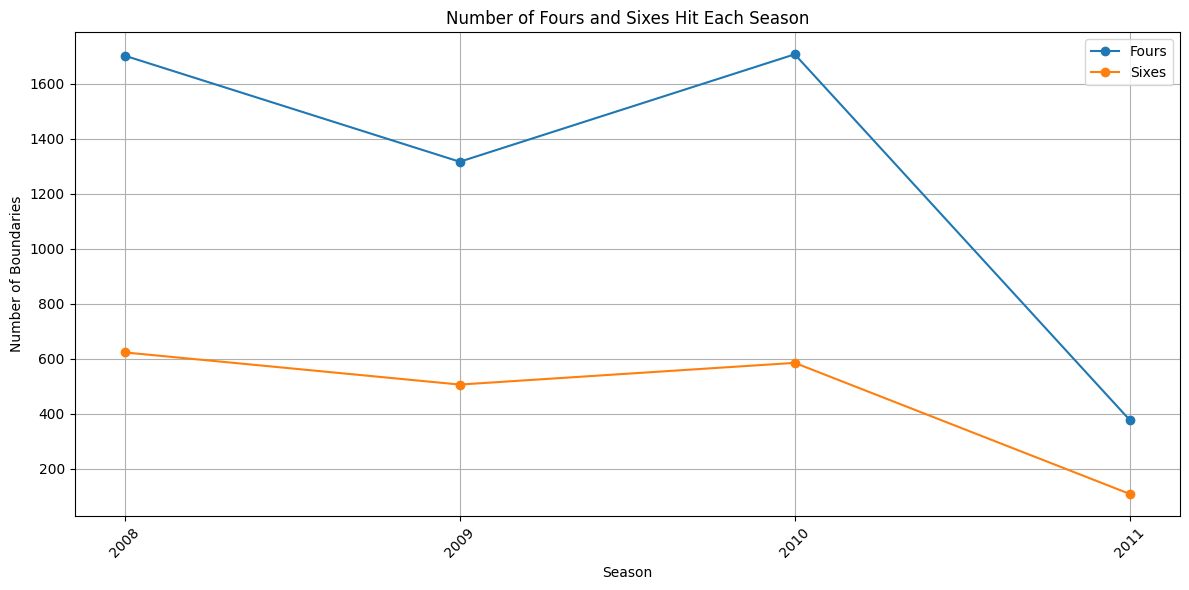

In [22]:
# Line plots of Fours and Sixes per Season
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataframes (assuming they are in the specified paths)
matches_df = pd.read_csv('/content/sample_data/IPL Matches 2008-2020.csv')
balls_df = pd.read_csv('/content/sample_data/IPL Ball-by-Ball 2008-2020.csv')

# Ensure the 'season' column exists in matches_df
if 'season' not in matches_df.columns:
    matches_df['date'] = pd.to_datetime(matches_df['date'])
    matches_df['season'] = matches_df['date'].dt.year

# Merge the dataframes to get season information for each ball
merged_df = balls_df.merge(matches_df[['id', 'season']], on='id', how='left')

# Filter for fours (batsman_runs == 4)
fours_df = merged_df[merged_df['batsman_runs'] == 4]
fours_per_season = fours_df['season'].value_counts().sort_index()

# Filter for sixes (batsman_runs == 6)
sixes_df = merged_df[merged_df['batsman_runs'] == 6]
sixes_per_season = sixes_df['season'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
plt.plot(fours_per_season.index, fours_per_season.values, marker='o', label='Fours')
plt.plot(sixes_per_season.index, sixes_per_season.values, marker='o', label='Sixes')
plt.title('Number of Fours and Sixes Hit Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Boundaries')
plt.xticks(fours_per_season.index, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3167828451.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_run_scorers.index, y=top_run_scorers.values, palette='viridis')


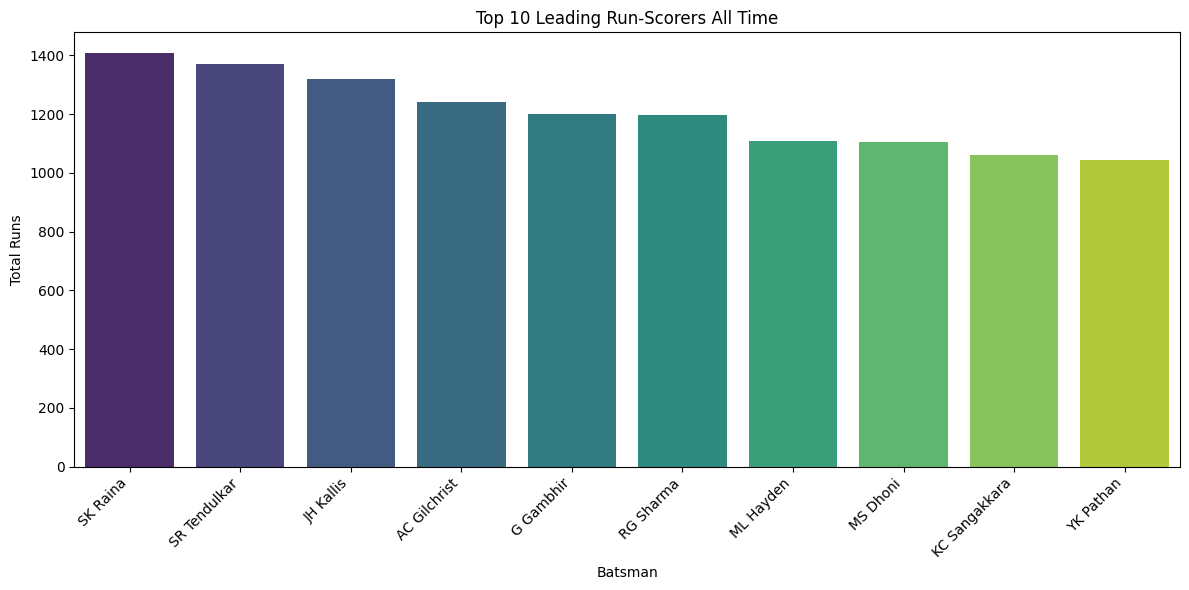

In [27]:
# Bar plot of Top Run-Scorers
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming top_run_scorers is already calculated and available
plt.figure(figsize=(12, 6))
sns.barplot(x=top_run_scorers.index, y=top_run_scorers.values, palette='viridis')
plt.title('Top 10 Leading Run-Scorers All Time')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1494747292.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_wicket_takers.index, y=top_10_wicket_takers.values, palette='viridis')


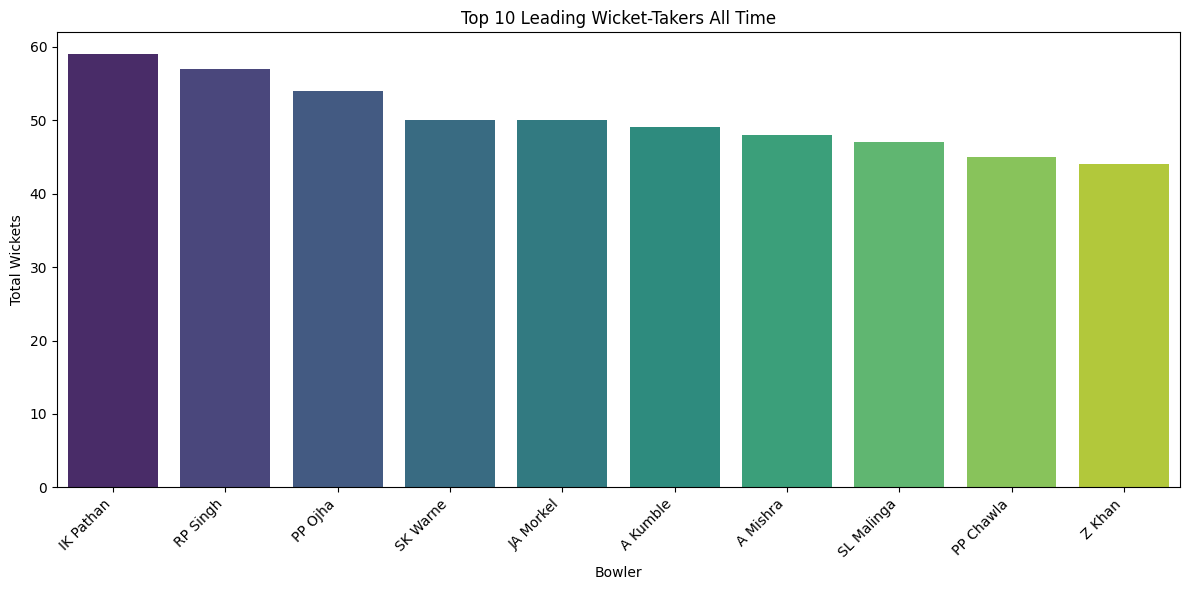

In [28]:
# Bar plot of Top Wicket-Takers
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming wicket_counts is already calculated and available
# Let's get the top 10 wicket-takers for the plot
top_10_wicket_takers = wicket_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_wicket_takers.index, y=top_10_wicket_takers.values, palette='viridis')
plt.title('Top 10 Leading Wicket-Takers All Time')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2709971607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts.values, palette='pastel')


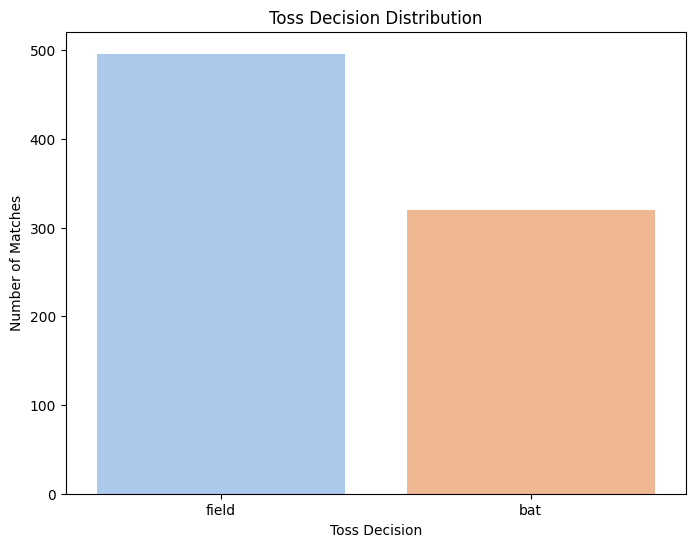

In [29]:
# Bar plot of Toss Decision Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming toss_decision_counts is already calculated and available
plt.figure(figsize=(8, 6))
sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts.values, palette='pastel')
plt.title('Toss Decision Distribution')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.show()

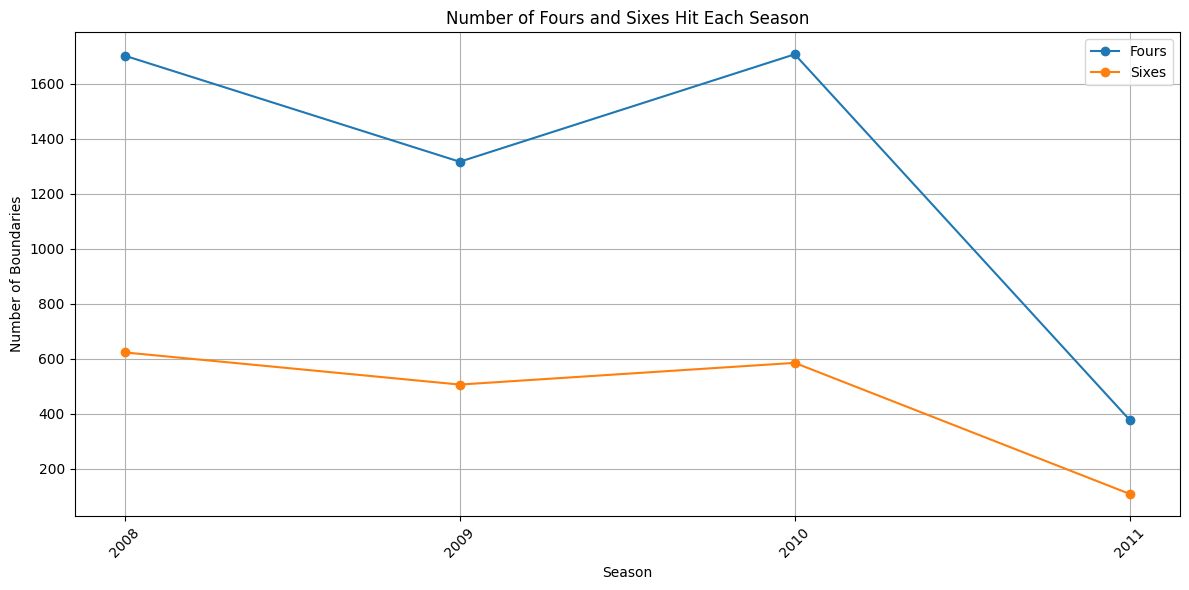

In [30]:
# Line plots of Fours and Sixes per Season
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recalculate fours_per_season
if 'season' not in matches_df.columns:
    matches_df['date'] = pd.to_datetime(matches_df['date'])
    matches_df['season'] = matches_df['date'].dt.year
merged_df = balls_df.merge(matches_df[['id', 'season']], on='id', how='left')
fours_df = merged_df[merged_df['batsman_runs'] == 4]
fours_per_season = fours_df['season'].value_counts().sort_index()

# Recalculate sixes_per_season
sixes_df = merged_df[merged_df['batsman_runs'] == 6]
sixes_per_season = sixes_df['season'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
plt.plot(fours_per_season.index, fours_per_season.values, marker='o', label='Fours')
plt.plot(sixes_per_season.index, sixes_per_season.values, marker='o', label='Sixes')
plt.title('Number of Fours and Sixes Hit Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Boundaries')
plt.xticks(fours_per_season.index, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3302403339.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_run_scorers.index, y=top_run_scorers.values, palette='viridis')


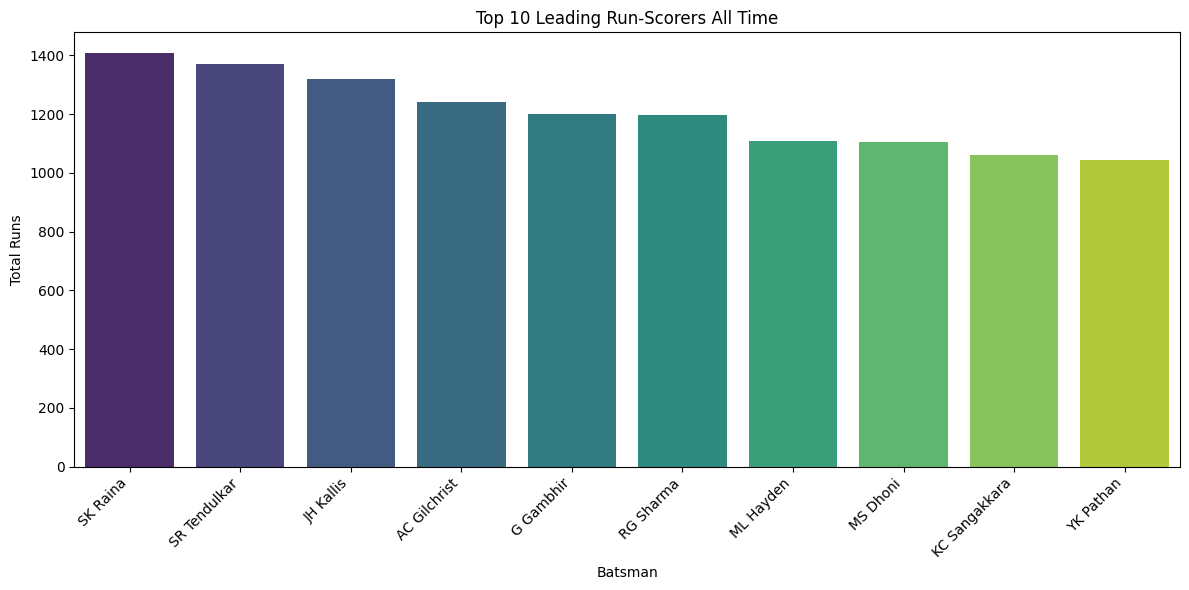

In [31]:
# Bar plot of Top Run-Scorers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recalculate top_run_scorers
top_run_scorers = balls_df.groupby('batsman') ['batsman_runs'].sum().sort_values (ascending = False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_run_scorers.index, y=top_run_scorers.values, palette='viridis')
plt.title('Top 10 Leading Run-Scorers All Time')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3759213010.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_wicket_takers.index, y=top_10_wicket_takers.values, palette='viridis')


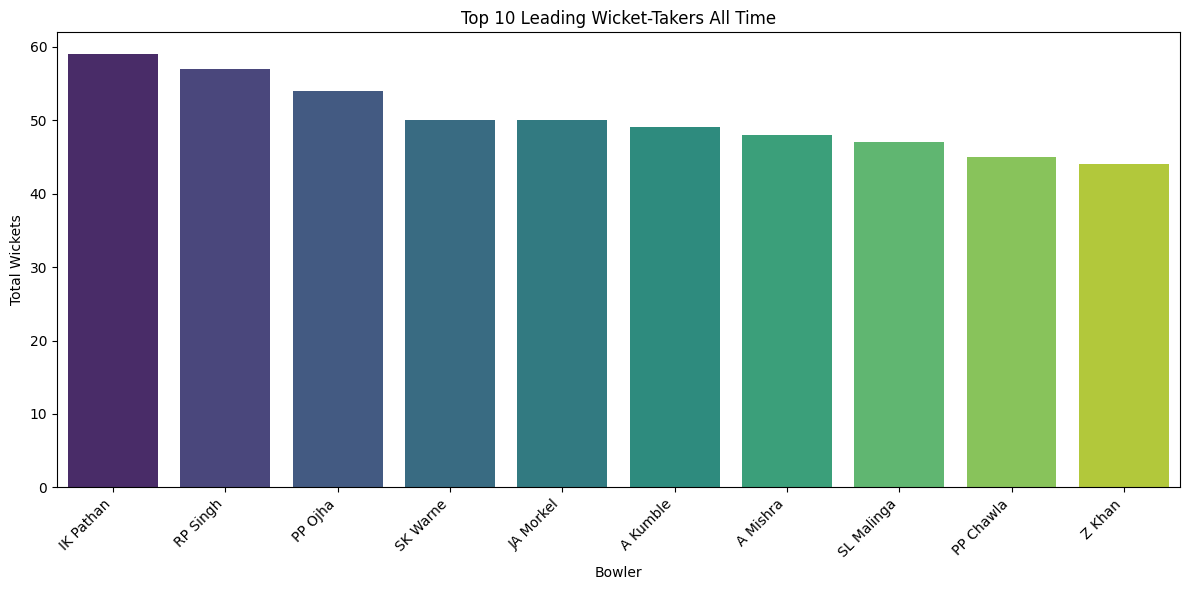

In [32]:
# Bar plot of Top Wicket-Takers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recalculate wicket_counts
wickets_df = balls_df[balls_df['is_wicket'] == 1]
wicket_counts = wickets_df['bowler'].value_counts()

# Let's get the top 10 wicket-takers for the plot
top_10_wicket_takers = wicket_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_wicket_takers.index, y=top_10_wicket_takers.values, palette='viridis')
plt.title('Top 10 Leading Wicket-Takers All Time')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4291151495.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts.values, palette='pastel')


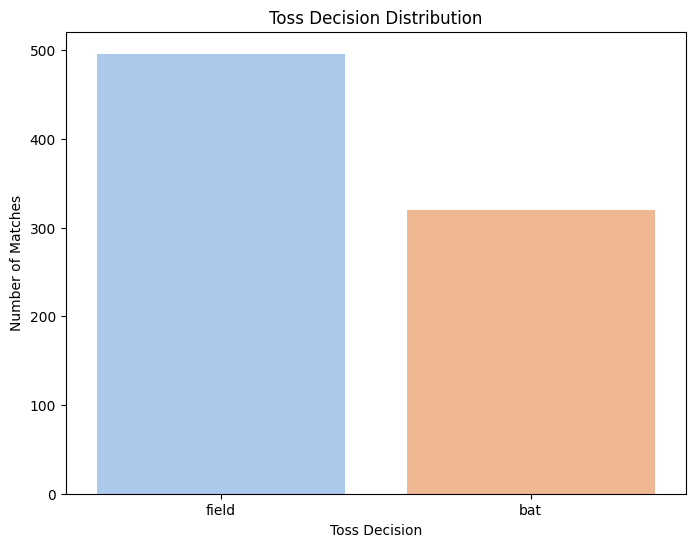

In [33]:
# Bar plot of Toss Decision Distribution
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recalculate toss_decision_counts
toss_decision_counts = matches_df['toss_decision'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts.values, palette='pastel')
plt.title('Toss Decision Distribution')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.show()

/tmp/ipython-input-1834487864.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_run_scorers.index, y=top_run_scorers.values, palette='viridis')


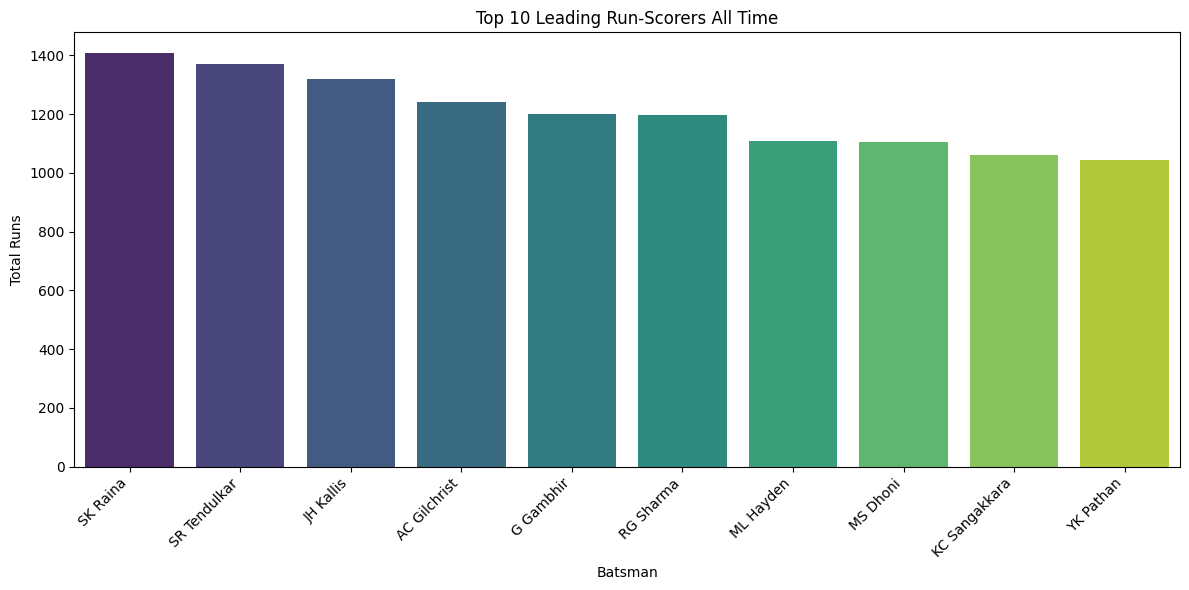

In [23]:
# Bar plot of Top Run-Scorers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load balls_df (assuming it's in the specified path)
balls_df = pd.read_csv('/content/sample_data/IPL Ball-by-Ball 2008-2020.csv')

# Recalculate top_run_scorers
top_run_scorers = balls_df.groupby('batsman') ['batsman_runs'].sum().sort_values (ascending = False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_run_scorers.index, y=top_run_scorers.values, palette='viridis')
plt.title('Top 10 Leading Run-Scorers All Time')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2781055294.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_wicket_takers.index, y=top_10_wicket_takers.values, palette='viridis')


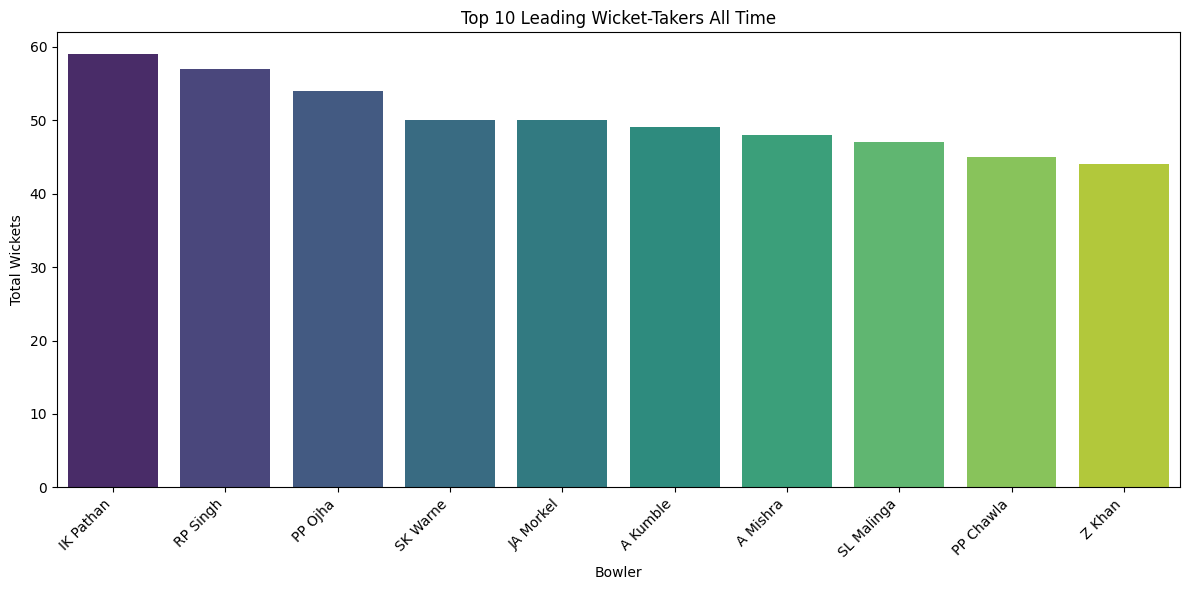

In [24]:
# Bar plot of Top Wicket-Takers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load balls_df (assuming it's in the specified path)
balls_df = pd.read_csv('/content/sample_data/IPL Ball-by-Ball 2008-2020.csv')

# Recalculate wicket_counts
wickets_df = balls_df[balls_df['is_wicket'] == 1]
wicket_counts = wickets_df['bowler'].value_counts()

# Let's get the top 10 wicket-takers for the plot
top_10_wicket_takers = wicket_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_wicket_takers.index, y=top_10_wicket_takers.values, palette='viridis')
plt.title('Top 10 Leading Wicket-Takers All Time')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1706412993.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts.values, palette='pastel')


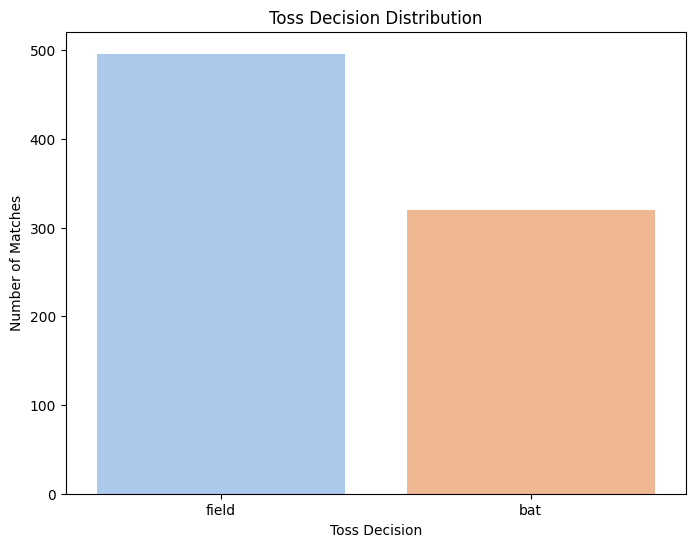

In [25]:
# Bar plot of Toss Decision Distribution
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load matches_df (assuming it's in the specified path)
matches_df = pd.read_csv('/content/sample_data/IPL Matches 2008-2020.csv')

# Recalculate toss_decision_counts
toss_decision_counts = matches_df['toss_decision'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts.values, palette='pastel')
plt.title('Toss Decision Distribution')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.show()